<a href="https://colab.research.google.com/github/manikanta741/datamining/blob/main/biasvariancemllab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
dataset = pd.read_csv('Salary_Data.csv')

In [3]:
dataset = dataset.drop_duplicates()

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=1/3,random_state=0)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = regressor.predict(X_test)

In [13]:
def calculate_bias(y_test, y_pred):
 return np.mean(y_pred - y_test)

def calculate_variance(y_pred):
 return np.var(y_pred)

def cross_validation(model, X, y, cv=5):
 kf = KFold(n_splits=cv, shuffle=True, random_state=0)
 biases, variances, mse_scores = [], [], []
 for train_idx, test_idx in kf.split(X):
  X_train, X_test = X[train_idx], X[test_idx]
  y_train, y_test = y[train_idx], y[test_idx]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  biases.append(calculate_bias(y_test, y_pred))
  variances.append(calculate_variance(y_pred))
  mse_scores.append(mean_squared_error(y_test, y_pred))
 return np.mean(biases), np.mean(variances), np.mean(mse_scores)

avg_bias, avg_variance, avg_mse = cross_validation(regressor, X, y)
print("Bias on Test Set:", calculate_bias(y_test, y_pred))
print("Variance on Test Set:", calculate_variance(y_pred))
print("Average Bias across CV:", avg_bias)

print("Average Variance across CV:", avg_variance)
print("Average MSE across CV:", avg_mse)

Bias on Test Set: 1413.8992754641579
Variance on Test Set: 742935582.4611685
Average Bias across CV: 16.848782400517393
Average Variance across CV: 632370656.6357104
Average MSE across CV: 33745311.16564371


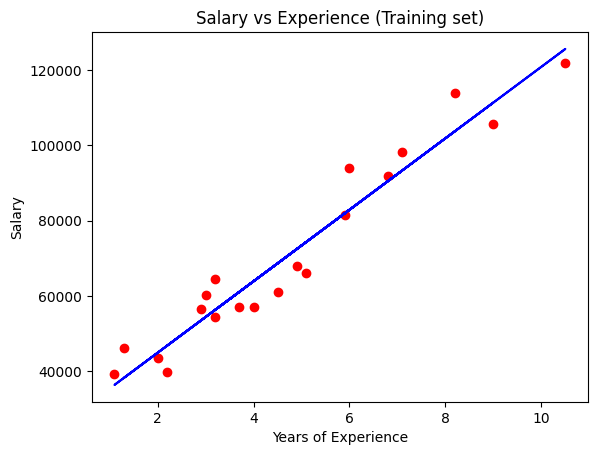

In [14]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


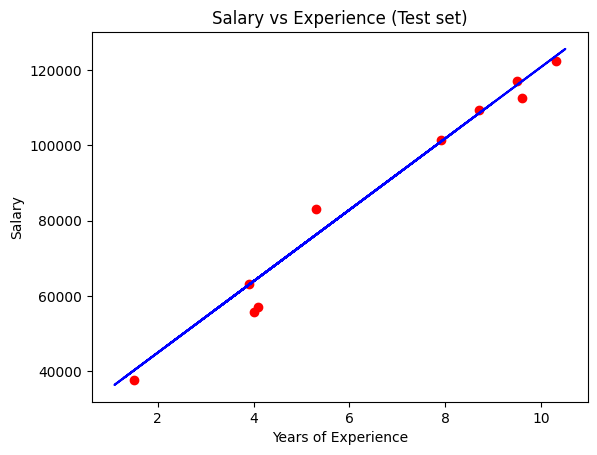

In [15]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()